<div class="competition-header__top-image" style="background-image: url(&quot;https://storage.googleapis.com/kaggle-competitions/kaggle/34377/logos/header.png?t=2022-02-11-21-53-06&quot;);"></div>

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/34377/logos/header.png?t=2022-02-11-21-53-06&quot" class="sc-djnptP ejNLeY">

# Spaceship Titanic 🛸
Predict which passengers are transported to an alternate dimension

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

# Goal 🎯

Predict whether the passenger was transported to another dimension in the `test.csv`.

<h1>Data Descriptions</h1>
<ul>
<li><strong>train.csv</strong> - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.<ul>
<li><code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form <code>gggg_pp</code> where <code>gggg</code> indicates a group the passenger is travelling with and <code>pp</code> is their number within the group. People in a group are often family members, but not always.</li>
<li><code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.</li>
<li><code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.</li>
<li><code>Cabin</code> - The cabin number where the passenger is staying. Takes the form <code>deck/num/side</code>, where <code>side</code> can be either <code>P</code> for <em>Port</em> or <code>S</code> for <em>Starboard</em>.</li>
<li><code>Destination</code> - The planet the passenger will be debarking to.</li>
<li><code>Age</code> - The age of the passenger.</li>
<li><code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.</li>
<li><code>RoomService</code>, <code>FoodCourt</code>, <code>ShoppingMall</code>, <code>Spa</code>, <code>VRDeck</code> - Amount the passenger has billed at each of the <em>Spaceship Titanic</em>'s many luxury amenities.</li>
<li><code>Name</code> - The first and last names of the passenger.</li>
<li><code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.</li></ul></li>
<li><strong>test.csv</strong> - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of <code>Transported</code> for the passengers in this set. </li>
<li><strong>sample_submission.csv</strong> - A submission file in the correct format.<ul>
<li><code>PassengerId</code> - Id for each passenger in the test set.</li>
<li><code>Transported</code> - The target. For each passenger, predict either <code>True</code> or <code>False</code>.</li></ul></li>
</ul>


In [1]:
%%capture

# importing dependencies 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

!pip install pycaret
!pip install autoviz
import pycaret

from ydata_profiling import ProfileReport

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [3]:
# importing the data

df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')   # read the csv files
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv') # read the csv files

In [4]:
# extracting the PassengerId for when predicting

PassengerId = df_test.PassengerId

print(PassengerId[:5]) # view the first PassengerIds (test data)

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: PassengerId, dtype: object


In [5]:
# displaying the data

print('\n train data \n')
display(df_train.head())

print('\n test data \n')
display(df_test.head())


 train data 



PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True


 test data 



PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

# Data Validation

In [6]:
# generating a quick data report in HTML

profile = ProfileReport(df_train, title="Spaceship Titanic Profiling Report", explorative=True)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# data types of the each column

df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
# describe the columns

df_train.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [8]:
# getting the totals of missing values in each column

viz1 = (df_train.isna()    # get the missing values
               .sum()      # add them up
               .to_frame() # make it look nice
               .T          # transpose the table (horizontal)
               .rename(index={0:'Missing values'})) # renameing the row
viz1

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age  \
Missing values            0         201        217    199          182  179   

                VIP  RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  Name  \
Missing values  203          181        183           208  183     188   200   

                Transported  
Missing values            0

In [9]:
# getting the totals of missing values in each column

viz2 = (df_test.isna()     # get the missing values
               .sum()      # add them up
               .to_frame() # make it a table
               .T          # transpose the table (horizontal)
               .rename(index={0:'Missing values'})) # renameing the row
viz2

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age  \
Missing values            0          87         93    100           92   91   

                VIP  RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  Name  
Missing values   93           82        106            98  101      80    94

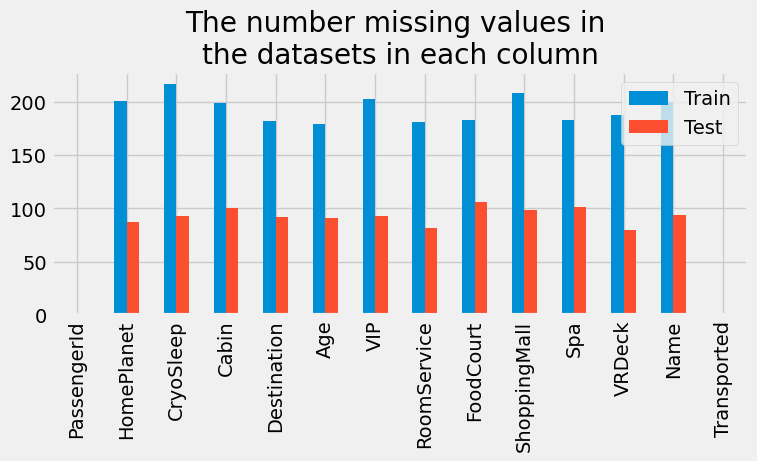

In [10]:
# stacking the two missing value tables & plotting them

viz = pd.concat([viz1, viz2])
viz.T.plot(kind='bar', figsize=(8,3))

plt.title('The number missing values in \nthe datasets in each column') # title
plt.legend(labels=['Train', 'Test']);                                   # rename legend items

Now, I'm going to impute (fix) the missing values in a more systematic ways:

In [11]:
# creating group and number id from PassengerId

# split PassengerId to GroupID & NumberID

df_train['GroupID'] = df_train['PassengerId'].str[:4]
df_train['NumberID'] = df_train['PassengerId'].str[5:]

df_test['GroupID'] = df_test['PassengerId'].str[:4]
df_test['NumberID'] = df_test['PassengerId'].str[5:]

# NA in paid services are turned to 0

df_train['RoomService'].fillna(0, inplace=True)
df_train['FoodCourt'].fillna(0, inplace=True)
df_train['ShoppingMall'].fillna(0, inplace=True)
df_train['Spa'].fillna(0, inplace=True)
df_train['VRDeck'].fillna(0, inplace=True)

df_test['RoomService'].fillna(0, inplace=True)
df_test['FoodCourt'].fillna(0, inplace=True)
df_test['ShoppingMall'].fillna(0, inplace=True)
df_test['Spa'].fillna(0, inplace=True)
df_test['VRDeck'].fillna(0, inplace=True)

# a new feature TotalBill from paid services 

df_train['TotalBill'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] \
                      + df_train['Spa'] + df_train['VRDeck']

df_test['TotalBill'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] \
                      + df_test['Spa'] + df_test['VRDeck']

# CryoSleep is True if TotalBill is 0, else False (naive) 

df_train.loc[(df_train['CryoSleep'].isna()) &  (df_train['TotalBill']==0), 'CryoSleep'] = True
df_train.loc[(df_train['CryoSleep'].isna()) &  (df_train['TotalBill']>0),  'CryoSleep'] = False

df_test.loc[(df_test['CryoSleep'].isna()) &  (df_test['TotalBill']==0), 'CryoSleep'] = True
df_test.loc[(df_test['CryoSleep'].isna()) &  (df_test['TotalBill']>0),  'CryoSleep'] = False

In [12]:
# replace Capin NAs w/ randoms

train_rand_cabin = []
np.random.seed(42)
for i in range(len(df_train['Cabin'][df_train['Cabin'].isna()])):
    _ = f"""{np.random.choice(['F', 'G', 'E', 'B', 'C', 'D', 'A', 'T'], 
           p=[0.328938, 0.301271, 0.103132, 0.091712, 0.087944, 0.056275, 0.030139, 0.000589])} \
           /{np.random.randint(0, 1894)}/{np.random.choice(['S', 'P'], p=[0.504827, 0.495173])}"""
    train_rand_cabin.append(_)

test_rand_cabin = []
np.random.seed(42)
for i in range(len(df_test['Cabin'][df_test['Cabin'].isna()])):
    _ = f"""{np.random.choice(['F', 'G', 'E', 'B', 'C', 'D', 'A', 'T'],
           p=[0.328938, 0.301271, 0.103132, 0.091712, 0.087944, 0.056275, 0.030139, 0.000589])}\ 
           /{np.random.randint(0, 1894)}/{np.random.choice(['S', 'P'], p=[0.504827, 0.495173])}"""
    test_rand_cabin.append(_)

# assign NAs the new randoms

df_train.loc[df_train['Cabin'].isna(), 'Cabin'] = train_rand_cabin
df_test.loc[df_test['Cabin'].isna(), 'Cabin'] = test_rand_cabin

# Split the 'Cabin' column into multiple columns

df_train_split = df_train['Cabin'].str.split('/', expand=True) \
                        .rename(columns={0: 'Cabin_deck', 1: 'Cabin_num', 2: 'Cabin_side'})
df_test_split = df_test['Cabin'].str.split('/', expand=True) \
                        .rename(columns={0: 'Cabin_deck', 1: 'Cabin_num', 2: 'Cabin_side'})

# Concatenate the split DataFrames with the original DataFrames

df_train = pd.concat([df_train, df_train_split], axis=1)
df_test = pd.concat([df_test, df_test_split], axis=1)

In [13]:
# imputing missing values in HomePlanet with a value based on the GroupID

# else, a random planet is chosen

Uniq_GID_by_plant = df_train.groupby('HomePlanet')['GroupID'].unique()
na_index = df_train.HomePlanet[df_train.HomePlanet.isna()].index

for i in na_index:
    if df_train.GroupID[i] in Uniq_GID_by_plant['Earth']:
        df_train.iloc[i, 1] = 'Earth'
    elif df_train.GroupID[i] in Uniq_GID_by_plant['Europa']:
        df_train.iloc[i, 1] = 'Europa'
    elif df_train.GroupID[i] in Uniq_GID_by_plant['Mars']:
        df_train.iloc[i, 1] = 'Mars'
    else:
        df_train.iloc[i, 1] = np.random.choice(['Earth', 'Europa', 'Mars'], p=[0.541922, 0.250942, 0.207136])
        
Uniq_GID_by_plant_t = df_test.groupby('HomePlanet')['GroupID'].unique()
na_index_t = df_test.HomePlanet[df_test.HomePlanet.isna()].index

for i in na_index_t:
    if df_test.GroupID[i] in Uniq_GID_by_plant_t['Earth']:
        df_test.iloc[i, 1] = 'Earth'
    elif df_test.GroupID[i] in Uniq_GID_by_plant_t['Europa']:
        df_test.iloc[i, 1] = 'Europa'
    elif df_test.GroupID[i] in Uniq_GID_by_plant_t['Mars']:
        df_test.iloc[i, 1] = 'Mars'
    else:
        df_test.iloc[i, 1] = np.random.choice(['Earth', 'Europa', 'Mars'], p=[0.540095, 0.239141, 0.220764])

In [14]:
# correcting strs containing "."

df_train.Destination = df_train.Destination.str.replace('8.', '8-')
df_test.Destination = df_test.Destination.str.replace('8.', '8-')

In [15]:
# imputing Destination using HomePlanet

na_Des_index = df_train.Destination[df_train.Destination.isna()].index

for i in na_Des_index:
    if df_train.HomePlanet[i] == 'Earth':
        df_train.iloc[i, 4] = np.random.choice(['TRAPPIST-1e', 'PSO J318-5-22', '55 Cancri e'], 
                                               p=[0.690616, 0.156543, 0.152841])
    elif df_train.HomePlanet[i] == 'Europa':
        df_train.iloc[i, 4] = np.random.choice(['TRAPPIST-1e', 'PSO J318-5-22', '55 Cancri e'], 
                                               p=[0.571097, 0.011617, 0.417286])
    elif df_train.HomePlanet[i] == 'Mars':
        df_train.iloc[i, 4] = np.random.choice(['TRAPPIST-1e', 'PSO J318-5-22', '55 Cancri e'], 
                                               p=[0.857305, 0.029445, 0.113250])
        
na_Des_index_t = df_test.Destination[df_test.Destination.isna()].index

for i in na_Des_index_t:
    if df_test.HomePlanet[i] == 'Earth':
        df_test.iloc[i, 4] = np.random.choice(['TRAPPIST-1e', 'PSO J318-5-22', '55 Cancri e'], 
                                               p=[0.71, 0.16, 0.13])
    elif df_test.HomePlanet[i] == 'Europa':
        df_test.iloc[i, 4] = np.random.choice(['TRAPPIST-1e', 'PSO J318-5-22', '55 Cancri e'], 
                                               p=[0.558325, 0.009970, 0.431705])
    elif df_test.HomePlanet[i] == 'Mars':
        df_test.iloc[i, 4] = np.random.choice(['TRAPPIST-1e', 'PSO J318-5-22', '55 Cancri e'], 
                                               p=[0.865011, 0.021598, 0.113391])

In [16]:
# impute the missing ages with the mean age

df_train = df_train.fillna(value={'Age':df_train.Age.mean()})
df_test = df_test.fillna(value={'Age':df_test.Age.mean()})

# those who have toral bill == 0, then it's very unlikely they are VIP

df_train.loc[(df_train.TotalBill==0)&(df_train.VIP.isna()), 'VIP'] = False
df_test.loc[(df_test.TotalBill==0)&(df_test.VIP.isna()), 'VIP'] = False

# the rest are classified as VIP if they have high total bill, else are made non-VIP (naive)

df_train.loc[(df_train.VIP.isna())&(df_train.TotalBill>1000), 'VIP'] = True
df_train.loc[(df_train.VIP.isna()), 'VIP'] = False

df_test.loc[(df_test.VIP.isna())&(df_test.TotalBill>1000), 'VIP'] = True
df_test.loc[(df_test.VIP.isna()), 'VIP'] = False

# dropping the name column

df_train.drop(columns=['Name'], inplace=True)
df_test.drop(columns=['Name'], inplace=True)

In [63]:
# correcting the data types

df_train.GroupID = df_train.GroupID.astype('int')
df_train.NumberID = df_train.NumberID.astype('int')

df_test.GroupID = df_test.GroupID.astype('int')
df_test.NumberID = df_test.NumberID.astype('int')

df_train.Cabin_num = df_train.Cabin_num.astype('int')
df_test.Cabin_num = df_test.Cabin_num.astype('int')

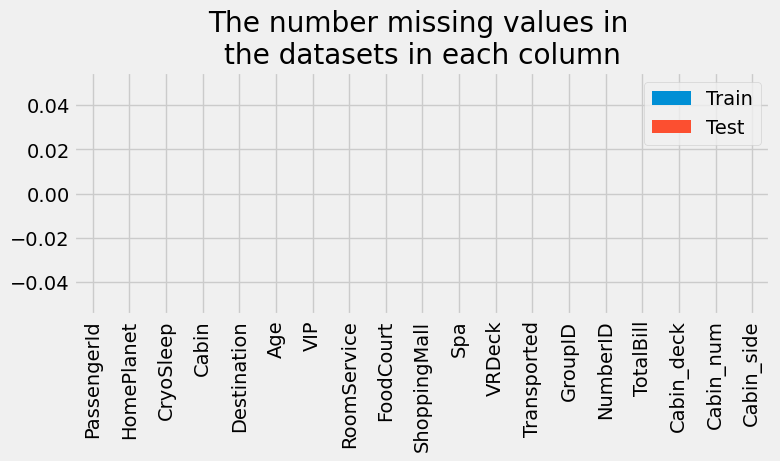

In [18]:
# getting the totals of missing values in each column

viz1 = (df_train.isna()    # get the missing values
               .sum()      # add them up
               .to_frame() # make it look nice
               .T          # transpose the table (horizontal)
               .rename(index={0:'Missing values'})) # renameing the row

viz2 = (df_test.isna()    # get the missing values
               .sum()      # add them up
               .to_frame() # make it look nice
               .T          # transpose the table (horizontal)
               .rename(index={0:'Missing values'})) # renameing the row

# stacking the two missing value tables & plotting them

viz = pd.concat([viz1, viz2])
viz.T.plot(kind='bar', figsize=(8,3))

plt.title('The number missing values in \nthe datasets in each column') # title
plt.legend(labels=['Train', 'Test']);                                   # rename legend items

# Exploratory Data Analysis (EDA)

Let's visualize the data!

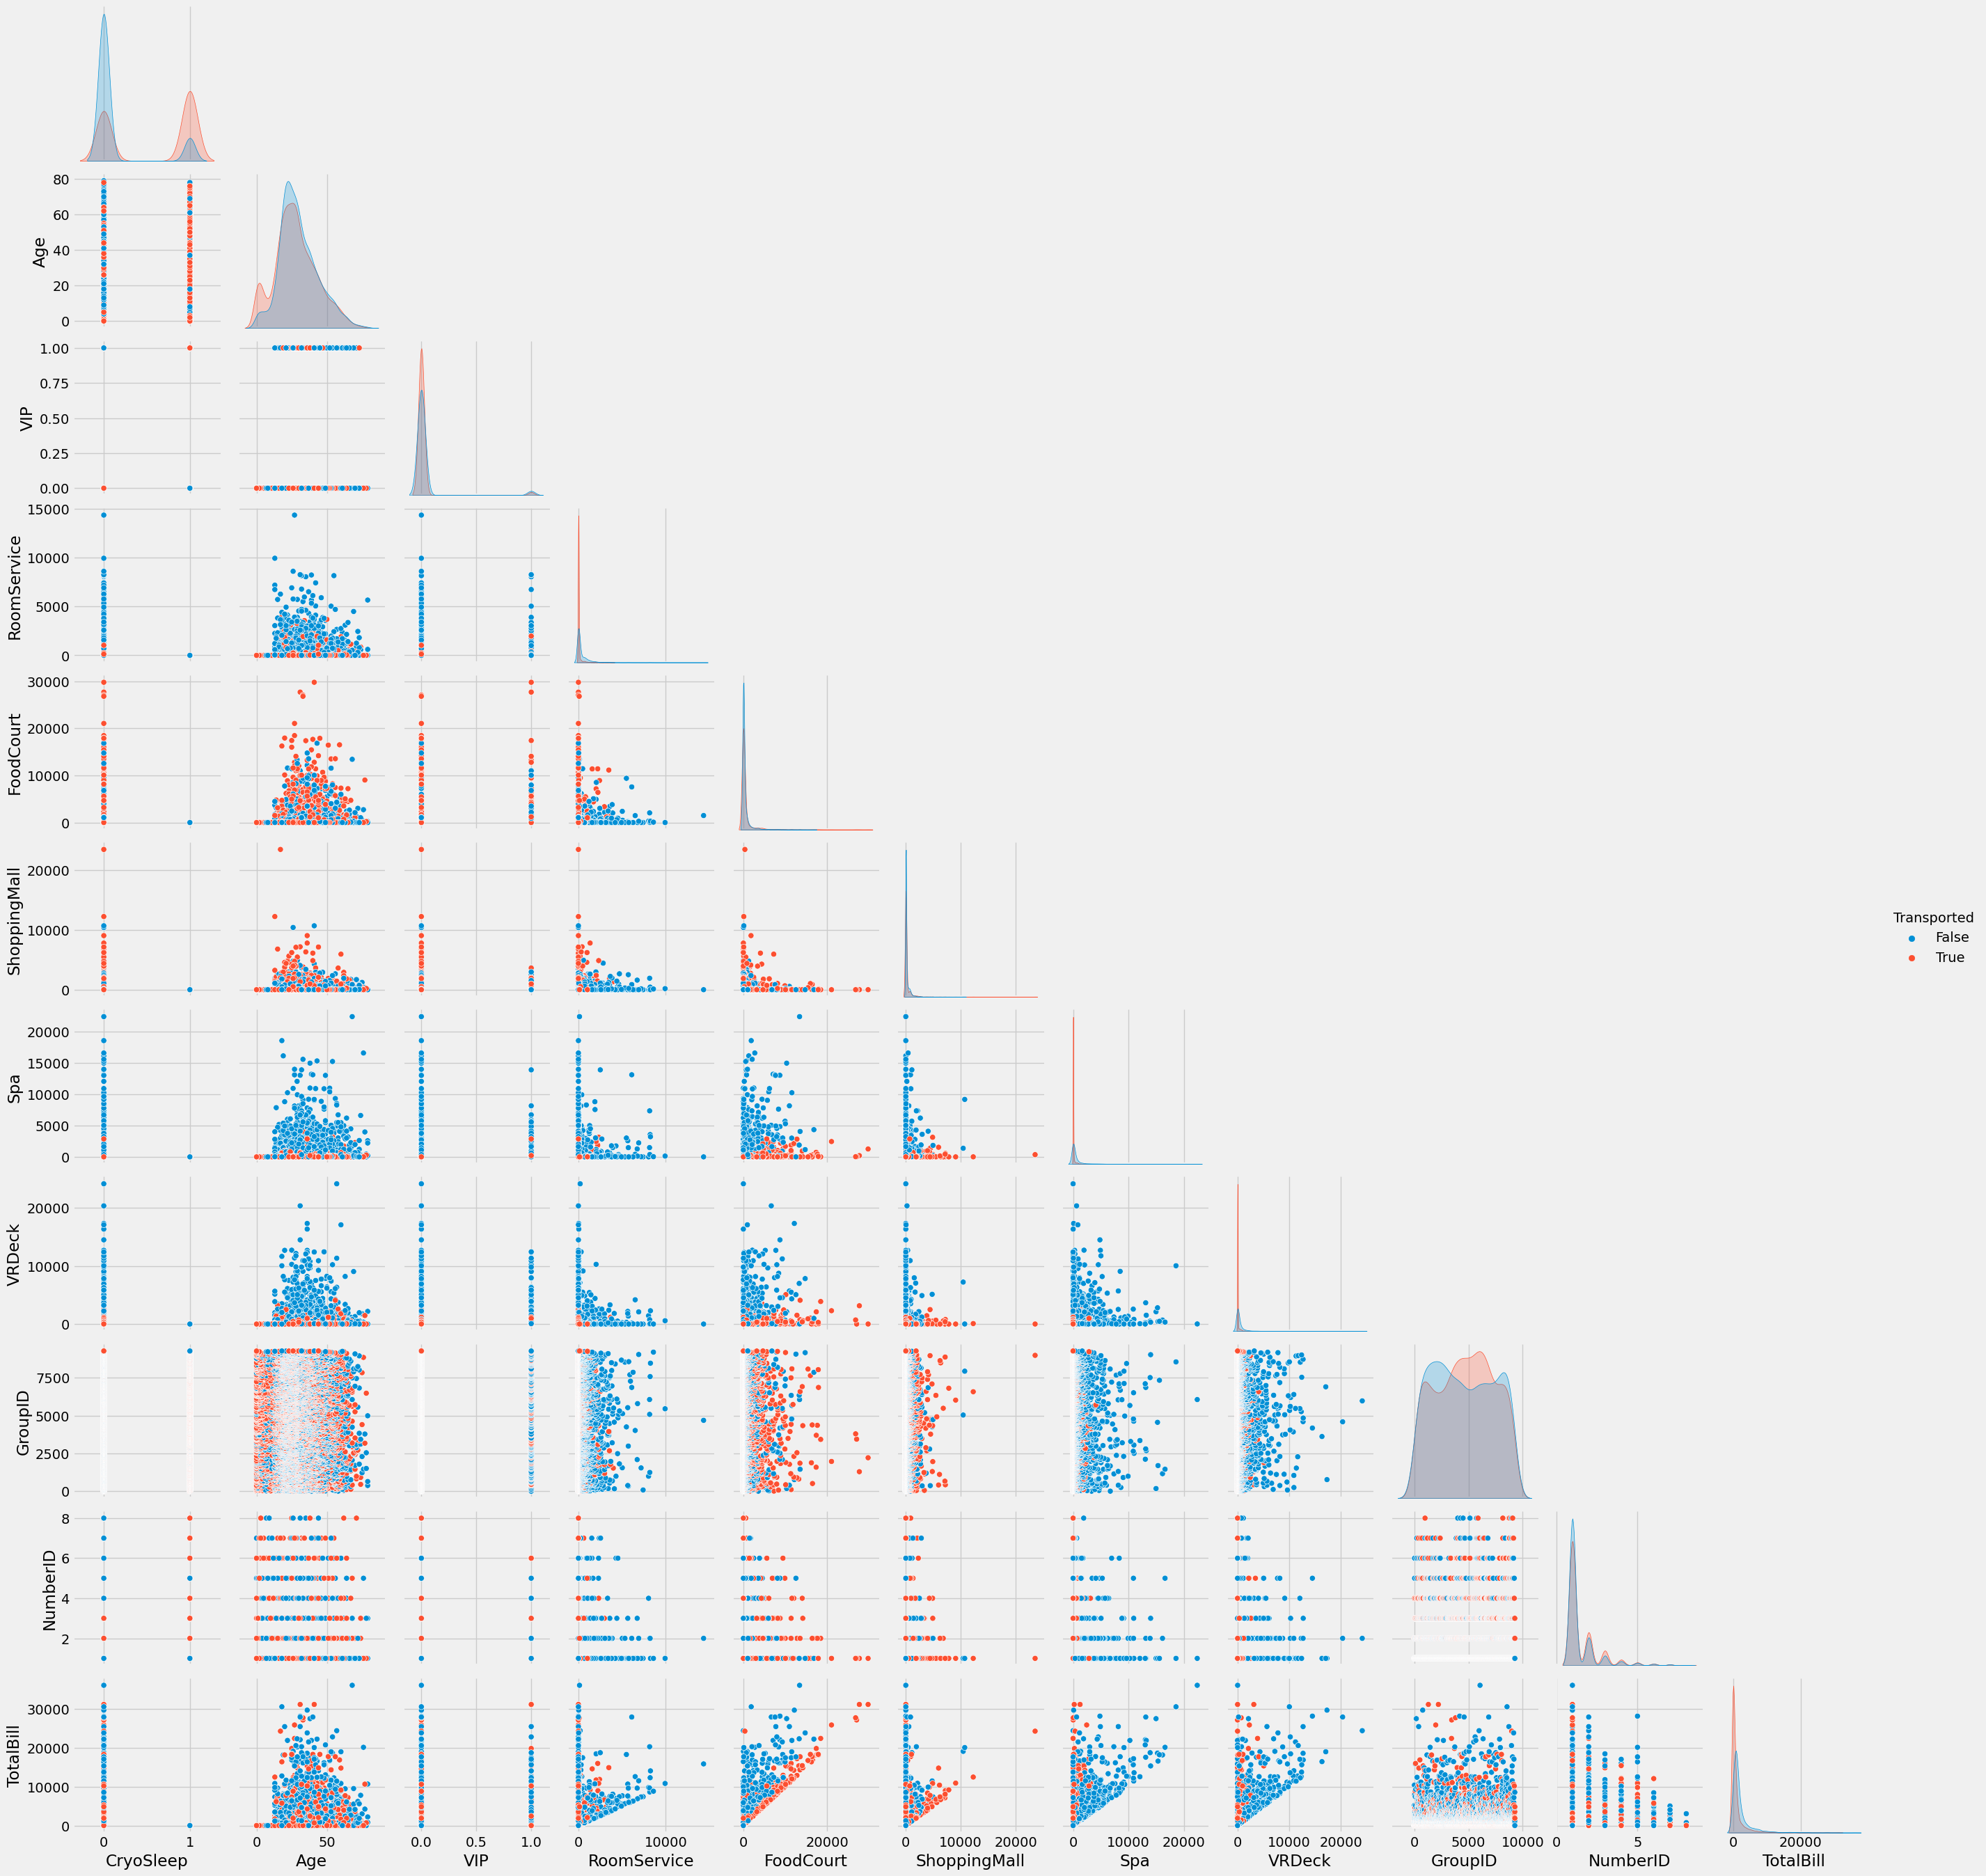

In [20]:
# plotting the relationships between the numerical variables

sns.pairplot(df_train, hue="Transported", corner=True);

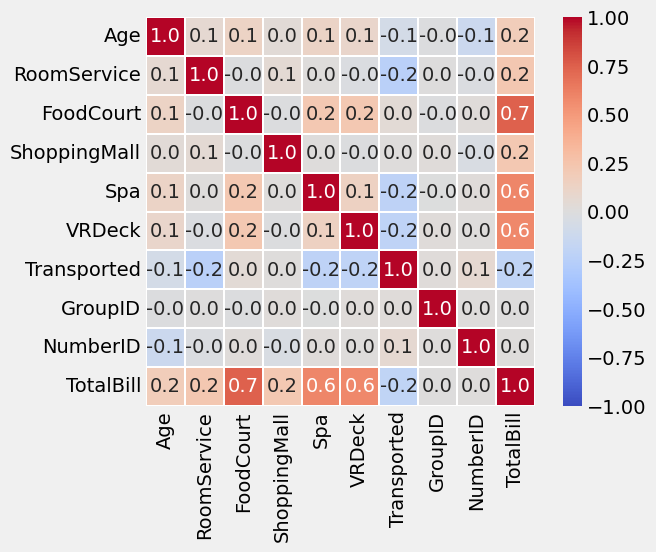

In [33]:
# plotting the correlations between the numerical variables

sns.heatmap(df_train.corr(numeric_only=True), 
            annot=True, 
            vmin=-1, 
            vmax=1, 
            fmt='.1f', 
            linewidths=0.05, 
            cmap="coolwarm", 
            square=True);

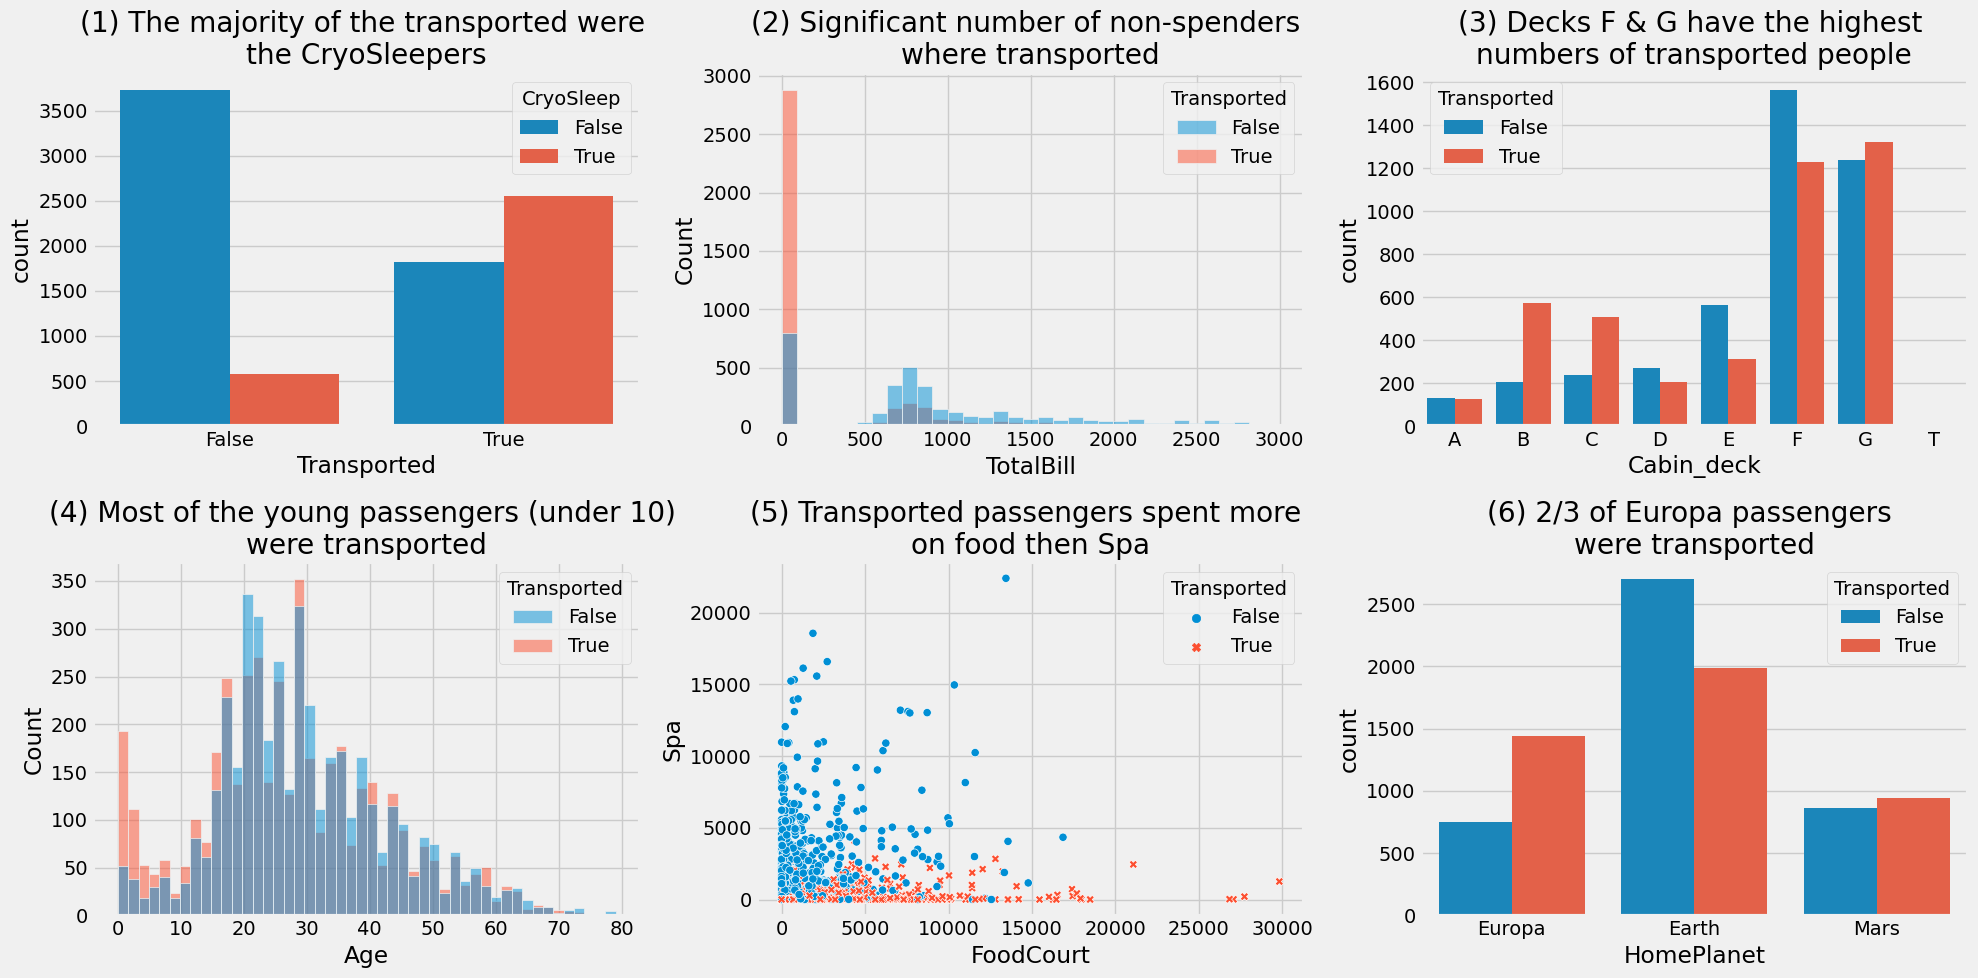

In [34]:
# Create subplots with desired layout

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

sns.countplot(data=df_train, x='Transported', hue='CryoSleep', ax=axes[0, 0])
axes[0,0].set_title('(1) The majority of the transported were \nthe CryoSleepers')

sns.histplot(data=df_train.query('TotalBill < 3000'), x='TotalBill', hue='Transported', ax=axes[0, 1])
axes[0,1].set_title('(2) Significant number of non-spenders \nwhere transported')

sns.countplot(data=df_train, x='Cabin_deck', hue='Transported', 
              order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], ax=axes[0, 2])
axes[0,2].set_title('(3) Decks F & G have the highest \nnumbers of transported people')

sns.histplot(data=df_train, x='Age', hue='Transported', ax=axes[1, 0])
axes[1,0].set_title('(4) Most of the young passengers (under 10) \nwere transported')

sns.scatterplot(data=df_train, hue='Transported', 
              x='FoodCourt', y='Spa', style='Transported', ax=axes[1, 1])
axes[1,1].set_title('(5) Transported passengers spent more \non food then Spa')

sns.countplot(data=df_train, x='HomePlanet', hue='Transported', ax=axes[1, 2])
axes[1,2].set_title('(6) 2/3 of Europa passengers \nwere transported')

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()

Here are the insights from the above charts:

1. The majority of the transported were the CryoSleepers
    - Passengers in cryosleep are confined to their cabins. This could mean that the transportation to another dimension happen where the cabins were.
2. Significant number of non-spenders where transported
    - It makes sense. Cryosleepers didn't spend money and a lot of them were transported.
3. Decks F & G have the highest numbers of transported people
    - No information about if cabin decks are ranked. F & G have more people and 50% each where transported. 2/3 of B & C passengers where transported.  
4. Most of the young passengers (under 10) were transported
    - The majority of persons under 10 were transported.
5. Transported passengers spent more on food than Spa
    - It's unclear how the paid services interact with eahc other
6. 2/3 of Europa passengers were transported
    - Europa passengers are the least lucky passengers. They are more likely to be transported then either Earth & Mars passengers.

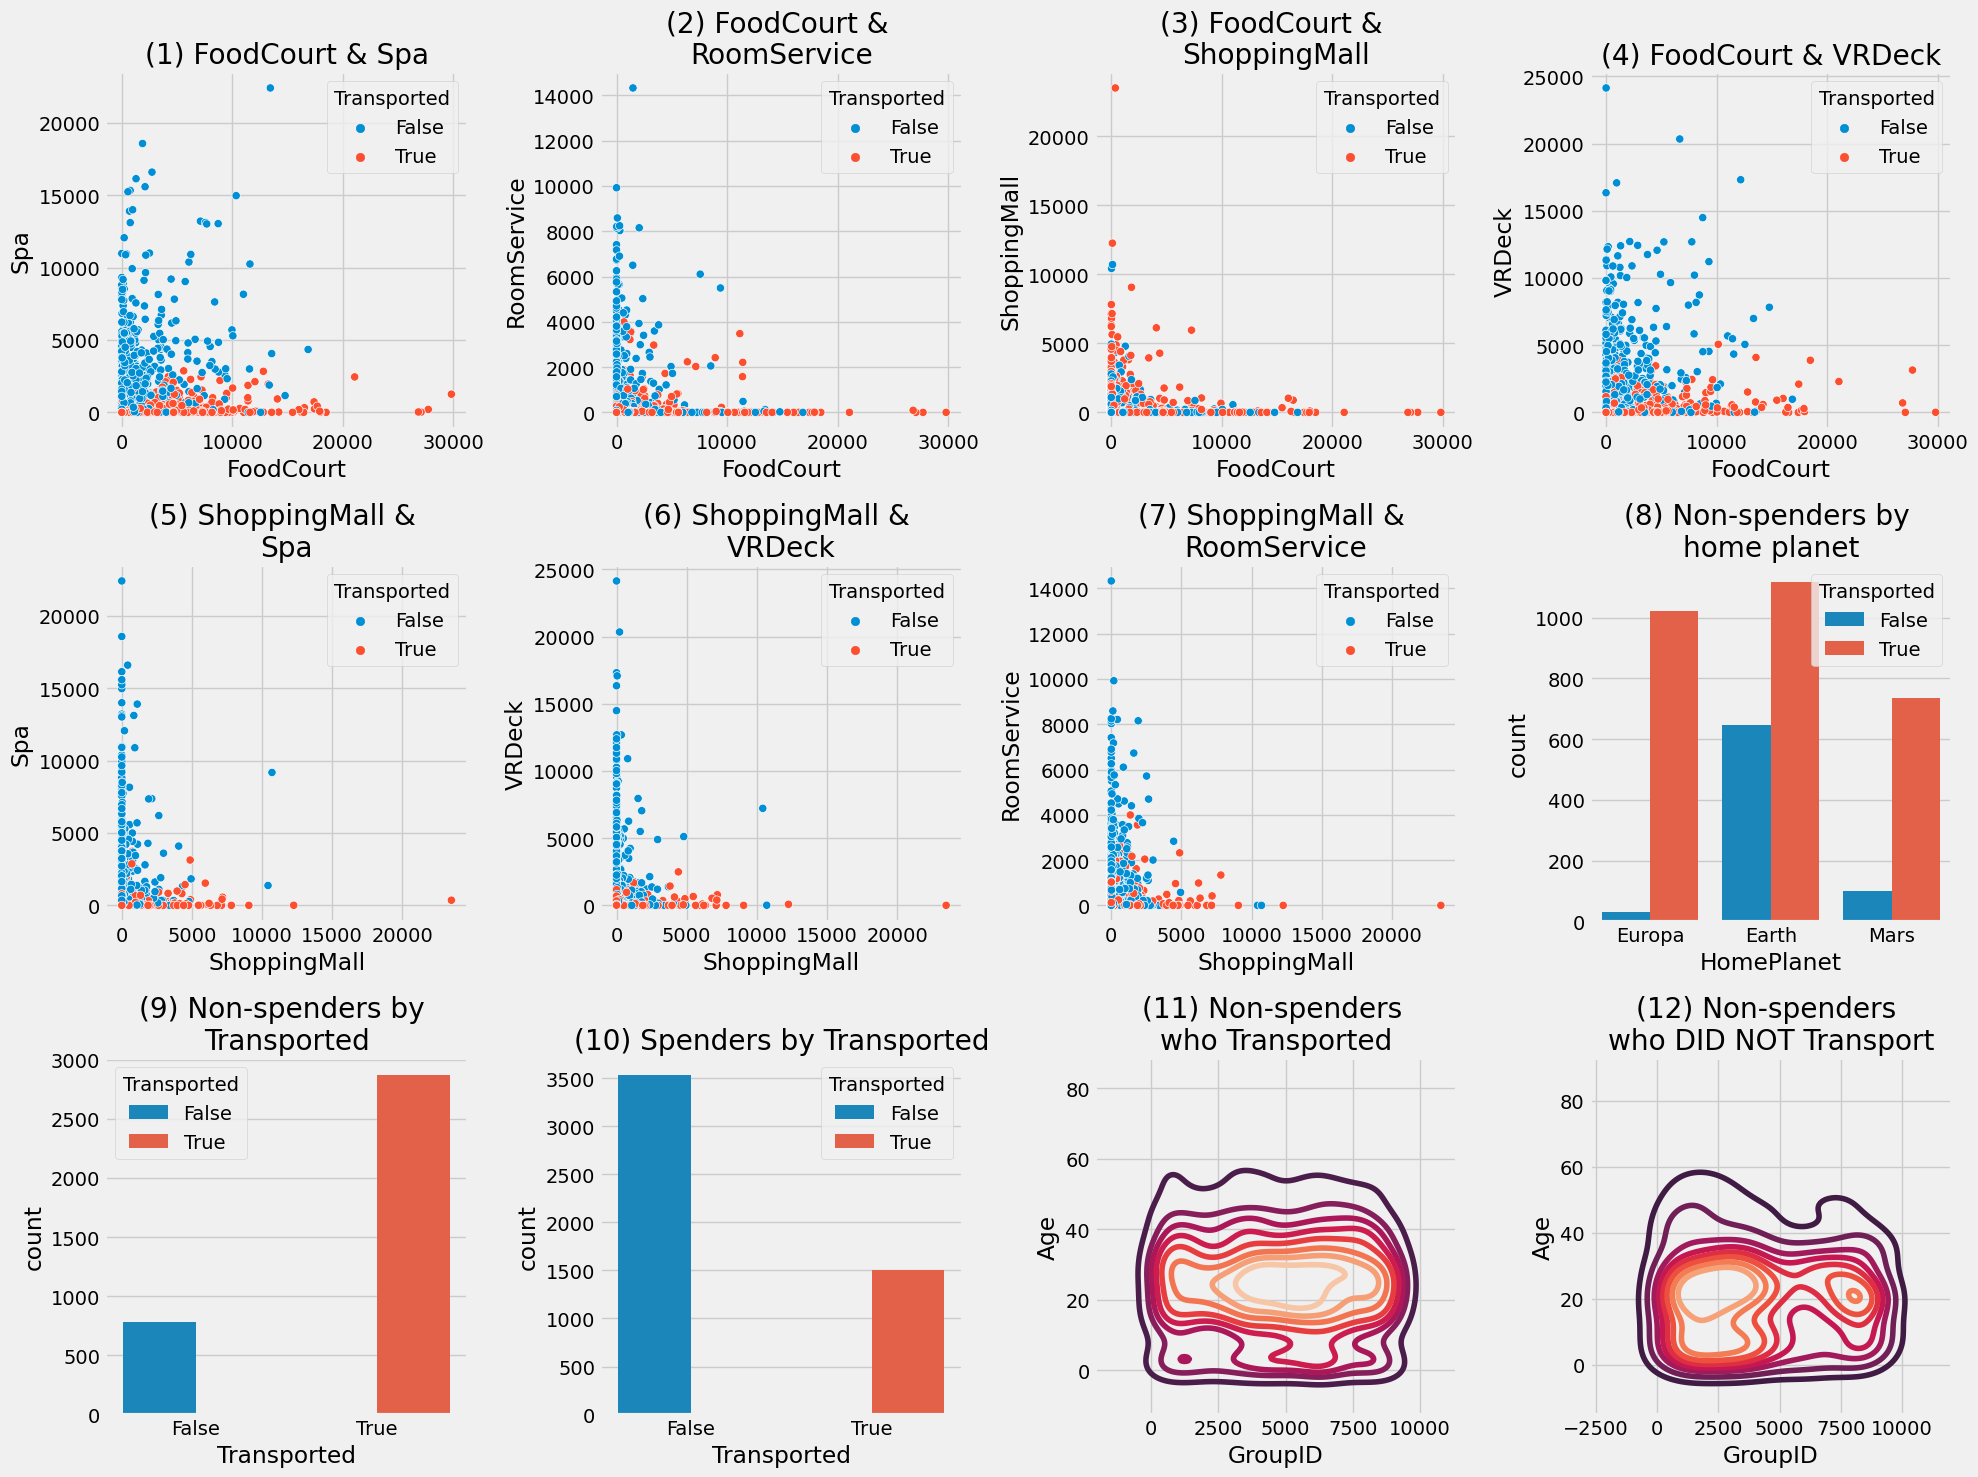

In [35]:
# Create subplots with desired layout

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

sns.scatterplot(data=df_train, hue='Transported', x='FoodCourt', y='Spa', ax=axes[0,0])
axes[0,0].set_title('(1) FoodCourt & Spa')
sns.scatterplot(data=df_train, hue='Transported', x='FoodCourt', y='RoomService', ax=axes[0,1])
axes[0,1].set_title('(2) FoodCourt & \nRoomService')
sns.scatterplot(data=df_train, hue='Transported', x='FoodCourt', y='ShoppingMall', ax=axes[0,2])
axes[0,2].set_title('(3) FoodCourt & \nShoppingMall')
sns.scatterplot(data=df_train, hue='Transported', x='FoodCourt', y='VRDeck', ax=axes[0,3])
axes[0,3].set_title('(4) FoodCourt & VRDeck')

sns.scatterplot(data=df_train, hue='Transported', x='ShoppingMall', y='Spa', ax=axes[1,0])
axes[1,0].set_title('(5) ShoppingMall & \nSpa')
sns.scatterplot(data=df_train, hue='Transported', x='ShoppingMall', y='VRDeck', ax=axes[1,1])
axes[1,1].set_title('(6) ShoppingMall & \nVRDeck')
sns.scatterplot(data=df_train, hue='Transported', x='ShoppingMall', y='RoomService', ax=axes[1,2])
axes[1,2].set_title('(7) ShoppingMall & \nRoomService')
sns.countplot(data=df_train.query('TotalBill == 0'), x='HomePlanet', hue='Transported', ax=axes[1, 3])
axes[1,3].set_title('(8) Non-spenders by \nhome planet')

sns.countplot(data=df_train.query('TotalBill == 0'), x='Transported', hue='Transported', ax=axes[2,0])
axes[2,0].set_title('(9) Non-spenders by \nTransported')
sns.countplot(data=df_train.query('TotalBill > 0'), x="Transported", hue='Transported', ax=axes[2,1])
axes[2,1].set_title('(10) Spenders by Transported')
sns.kdeplot(data=df_train.query('TotalBill == 0 & Transported == True'), x="GroupID", y="Age", fill=False, thresh=0, cmap="rocket", ax=axes[2, 2])
axes[2,2].set_title('(11) Non-spenders \nwho Transported')
sns.kdeplot(data=df_train.query('TotalBill == 0 & Transported == False'), x="GroupID", y="Age", fill=False, thresh=0, cmap="rocket", ax=axes[2, 3])
axes[2,3].set_title('(12) Non-spenders \nwho DID NOT Transport')

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()

1. FoodCourt & Spa
    - Transported people spent more on food, less on Spa.
2. FoodCourt & RoomService
    - Transported people spent more on food, less on room services.
3. FoodCourt & ShoppingMall
    - Transported spent more on food & shopping. We don't when and where the transportation happeed exactly, but I suspect it happen near the Food Court & Mall.
4. FoodCourt & VRDeck
    - Transported people spent more on food, less on room VR.
5. ShoppingMall & Spa
    - Transported people spent more on shopping, less on Spa.
6. ShoppingMall & VRDeck
    - Transported people spent more on shopping, less on VR.
7. ShoppingMall & RoomService
    - Transported people spent more on shopping, less on room services.
8. Non-spenders by home planet
    - Non-spenders (48% of train data) who come from Europa & Mars almost of certain were transported.
9. Non-spenders by Transported
    - Among the non-spenders, 78% were transported.
10. Spenders by Transported
    - Among the spenders, 70% were NOT transported.
11. Non-spenders who Transported
    - With age as the y-axis, transported people are mostly in the mid range in the group-id.
12. Non-spenders who DID NOT Transport
    - With age as the y-axis, non-transported people are mostly in the left range in the group-id.

It appears from the previous graphs that spending has some association with being transported or not. I'm going to add a boolean column for whether some was a spender or not.

In [87]:
# adding new columns to both datasets (w/ high correlations)

# adding if spender or not

df_train = df_train.assign(Spent=np.where(df_train.TotalBill > 0, 'Spender', 'Non_Spender'))
df_test = df_test.assign(Spent=np.where(df_test.TotalBill > 0, 'Spender', 'Non_Spender'))

# RoomService + Spa + VRDeck /divide by/ TotalBill

df_train = df_train.assign(RSVR=lambda df: ((df['RoomService']+df['Spa']+df['VRDeck'])/df['TotalBill']).fillna(0))
df_test = df_test.assign(RSVR=lambda df: ((df['RoomService']+df['Spa']+df['VRDeck'])/df['TotalBill']).fillna(0))

# Non-spenders from Mars or Europa

df_train = df_train.assign(EurMar_no_spend=lambda df: np.where((df['TotalBill']==0) & (df['HomePlanet']!='Earth'), 1, 0))
df_test = df_test.assign(EurMar_no_spend=lambda df: np.where((df['TotalBill']==0) & (df['HomePlanet']!='Earth'), 1, 0))

# Non-spenders in Cryosleep

df_train = df_train.assign(Cryo_no_spend=lambda df: np.where((df['TotalBill']==0) & (df['CryoSleep']==True), 1, 0))
df_test = df_test.assign(Cryo_no_spend=lambda df: np.where((df['TotalBill']==0) & (df['CryoSleep']==True), 1, 0))

# Spenders not in Cryosleep

df_train = df_train.assign(Cryo_spend=lambda df: np.where((df['TotalBill']>0) & (df['CryoSleep']==False), 1, 0))
df_test = df_test.assign(Cryo_spend=lambda df: np.where((df['TotalBill']>0) & (df['CryoSleep']==False), 1, 0))

# Spa & VR only

df_train = df_train.assign(Spa_VR=lambda df: ((df['Spa']+df['VRDeck'])/df['TotalBill']).fillna(0))
df_test = df_test.assign(Spa_VR=lambda df: ((df['Spa']+df['VRDeck'])/df['TotalBill']).fillna(0))

# Prediction

In [89]:
# import pycaret classification and init setup

from pycaret.classification import *

s = setup(df_train, 
          target='Transported', 
          train_size=0.75, 
          session_id=1, 
          ignore_features=['PassengerId', 'Cabin'], 
          polynomial_features=True, 
          bin_numeric_features=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 
                                'Spa', 'VRDeck', 'GroupID', 'TotalBill', 'Cabin_num', 
                                'Spa_VR', 'RSVR'], 
          remove_outliers=True, 
          normalize=True, 
          fold=5, 
          categorical_features=['HomePlanet', 'Destination', 'Cabin_deck', 'Cabin_side', 'Spent', 
                                'EurMar_no_spend', 'Cryo_spend'], 
          keep_features=['CryoSleep', 'HomePlanet'], # HomePlanet added
          polynomial_degree=2, 
          transformation=True, # new
          group_features=['RoomService', 'FoodCourt', 'ShoppingMall', 
                                'Spa', 'VRDeck'])

In [90]:
# top 3 models based on accuracy

base_model = compare_models(sort='Accuracy', fold=5)

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [91]:
# the best model (higher accuracy)

base_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

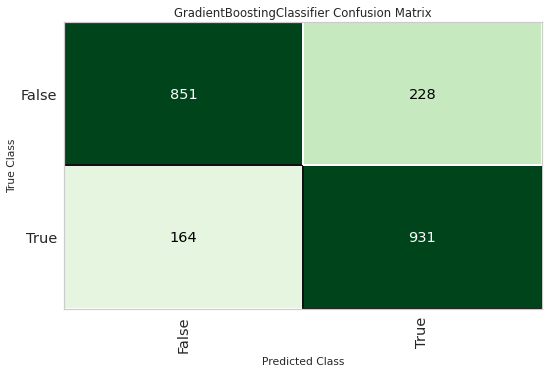

In [92]:
# plot confusion matrix of the best model

plot_model(base_model, plot = 'confusion_matrix', scale=0.7)

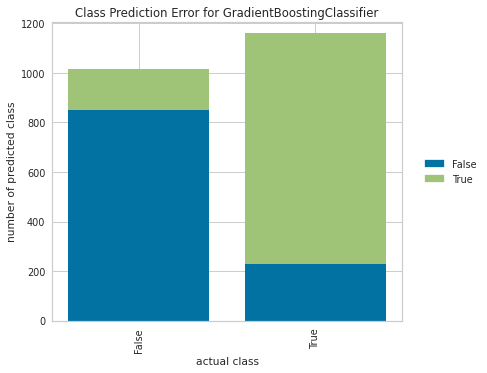

In [93]:
# plot error of the best model

plot_model(base_model, plot = 'error', scale=0.7)

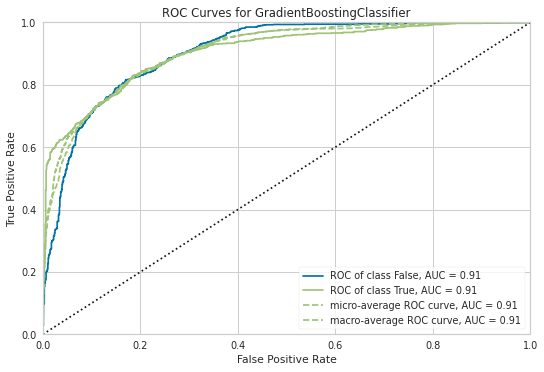

In [94]:
# plot AUC

plot_model(base_model, plot = 'auc', scale=0.7)

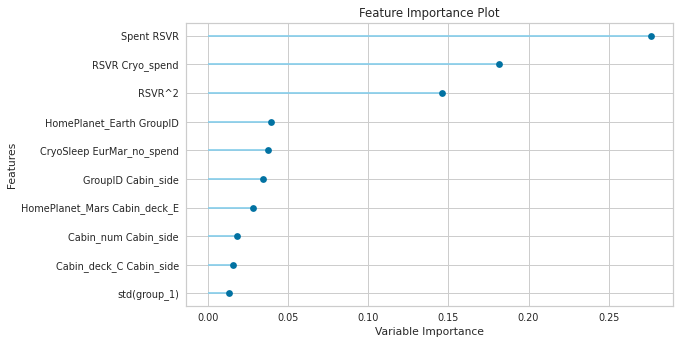

In [95]:
# plot feature importance
plot_model(base_model, plot = 'feature', scale=0.7)

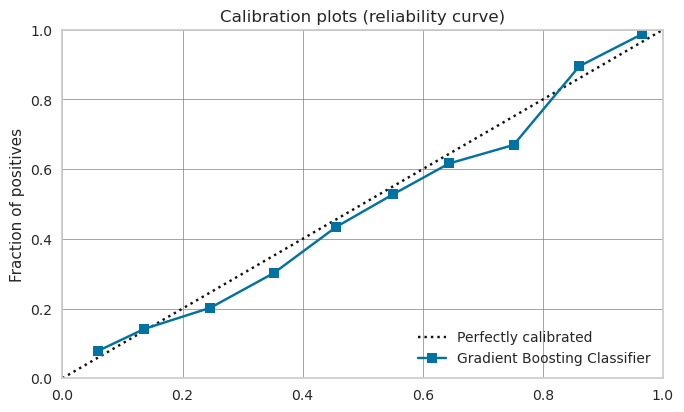

In [96]:
# check calbiration of default dt

plot_model(base_model, plot = 'calibration')

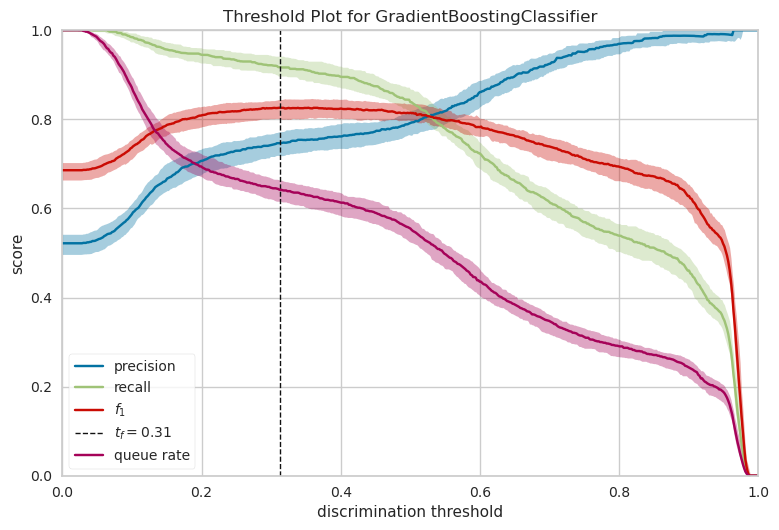

In [99]:
plot_model(base_model, plot='threshold')

In [101]:
base_model = tune_model(base_model, n_iter=50, fold=5, early_stopping=True, early_stopping_max_iters=5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [102]:
# finding the best thresholds to classify 0 or 1

from sklearn.metrics import accuracy_score

pred_train = predict_model(base_model, raw_score=True)

def find_best_threshold(y_true, probabilities):
    thresholds = np.linspace(0, 1, 1000)  # Generate 100 threshold values between 0 and 1
    best_threshold = None
    best_accuracy = 0

    for threshold in thresholds:
        y_pred = (probabilities >= threshold).astype(int)
        accuracy = accuracy_score(y_true, y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold

    return best_threshold, best_accuracy

best_threshold, best_accuracy = find_best_threshold(pred_train.Transported.astype('int'), 
                                                    pred_train['prediction_score_1'])

print(f"Best Threshold: {best_threshold:.3f}")
print(f"Best Accuracy: {best_accuracy:.3f}")


Best Threshold: 0.526
Best Accuracy: 0.823


In [121]:
# train the whole df_train dataset

base_model = finalize_model(base_model)

# predict on new data (df_test)

pred_test = predict_model(base_model, data = df_test, probability_threshold=0.5, raw_score=True)

pred_test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall  ...  Cabin_side        Spent  \
0          0.0        0.0           0.0  ...           S  Non_Spender   
1          0.0        9.0           0.0  ...           S      Spender   
2          0.0        0.0           0.0  ...           S  Non_Spender   
3          0.0     6652.0           0.0  ...           S      Spender   
4         10.0        0.0         635.0  ...           S      Spender   

       RSVR  EurMar_no_spend  Cryo_no_spend Cryo_spend    Spa_VR  \
0  0.000000                0              1          0  0.000000   
1  0.996822                0              0          1  0.996822   
2  0.000000                1              1          0  0.000000   
3  0.103262                0              0          1  0.103262   
4  0.015504                0              0          1  0.000000   

  prediction_label prediction_score_0  prediction_score_1  
0                0             0.5178              0.4822  
1                0             0.9677              0.0323  
2                1             0.0855              0.9145  
3                1             0.0742              0.9258  
4                0             0.5167              0.4833  

[5 rows x 27 columns]

In [119]:
# putting the submission together

Submission = pd.DataFrame(data={'PassengerId':PassengerId, 'Transported':[True if x > 0 else False for x in pred_test['prediction_label']]})

# saving the predictions in a csv file for submission

Submission.to_csv('submission23_50.csv', index=False)

Submission.head()

PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False

# Result

Top 451 out of 2,470

🥳 This is the Best Entry!The most recent submission scored **0.80476**, which is an improvement of my previous score of 0.80056.